# Makine Öğrenmesi Nedir???

### Bilgisayarların insanlara benzer şekilde öğrenmeyi sağlamak maksadıyla çeşitli algoritma tekniklerin geliştirilmesi için çalışan bilimsel çalışma alanıdır.

### Bizim insan olarak yapacağımız çıkarımlar analizler mevcut olabilir ancak milyon tane datayı insan analiz edemez ölçekliyemez. Bu durumda makine öğrenmesi devreye giriyor.

## Model Doğrulama Yöntemleri

### 1 Holdout Yöntemi : Eğitim ve test veri seti olarak ayrılır datamız 

### 2 k fold cross validation

### 3 bosstrap

## Model Başarı Değerlendirme ; Regresyon 

### 1 MSE

### 2 RMSE

### 3 MAE

### ***Varyans : Değişkenliliktir. Modelin hassaslığıdır. Model aşırı hassas ise varyans yüksektir ve -bu duruma overfitting denir.

### Varyansın yükesk olması var olan datalar işlenmesi durumunda iyi bir fonksiyon yaratması durumudur aslında . Ancak biz ML modelleri kurarken ve dataları eğitirken özel fonksiyon değilde genel fonksiyon uydurmaya çalışırız. Amacımız budur. GENELLİK.

### Rastsallığı bbozmadan verinin kendisini değilde Yapısını öğrenmemiz gerekiyor.

# Doğrusal Regresyon ve Kuzenleri

## Basit Doğrusal Regresyon

### Temel amaç , bağımlu ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

In [1]:
import pandas as pd 

In [2]:
ad = pd.read_csv(r"C:\Users\20190855029\data_ML\Advertising.csv")

In [3]:
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ad = ad.iloc[:,1:]

In [5]:
ad

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df = ad 
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [10]:
import seaborn as sns

C:\Users\20190855029\AppData\Local\anaconda3\envs\spyder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


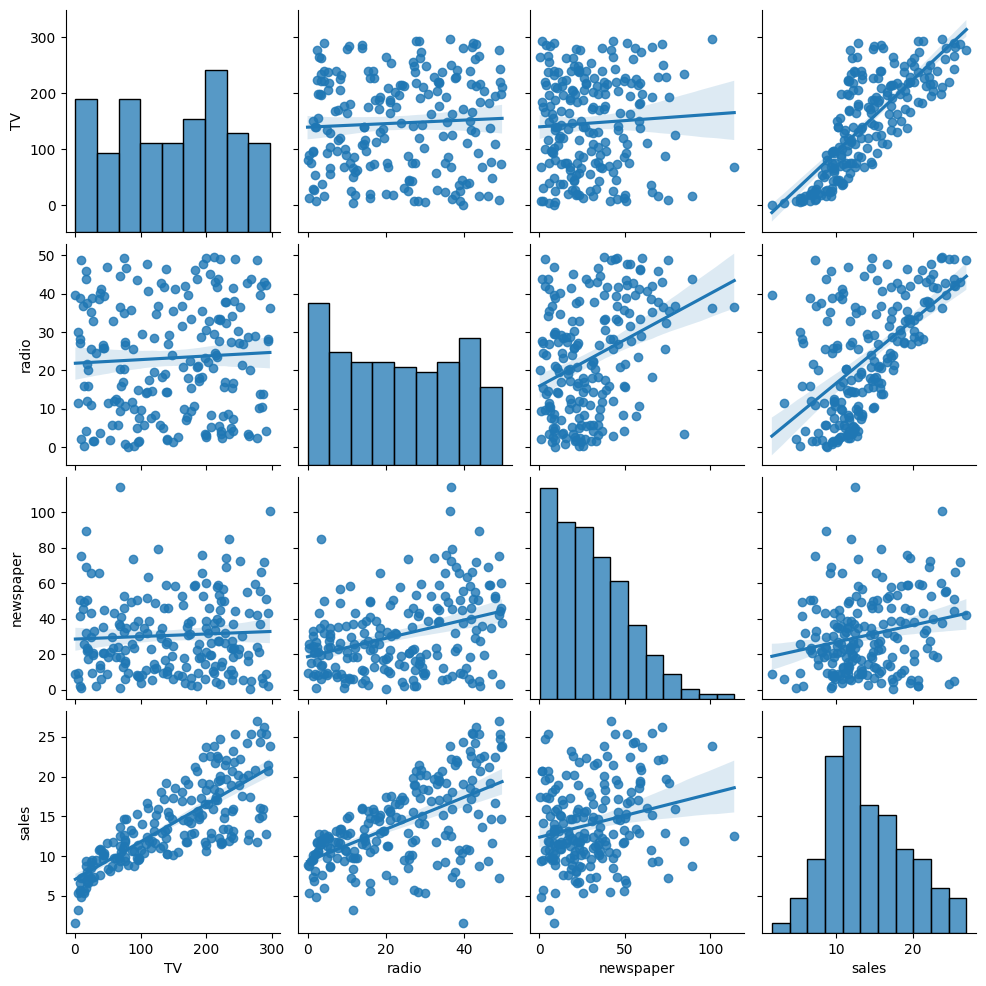

In [11]:
sns.pairplot(df,kind="reg")

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


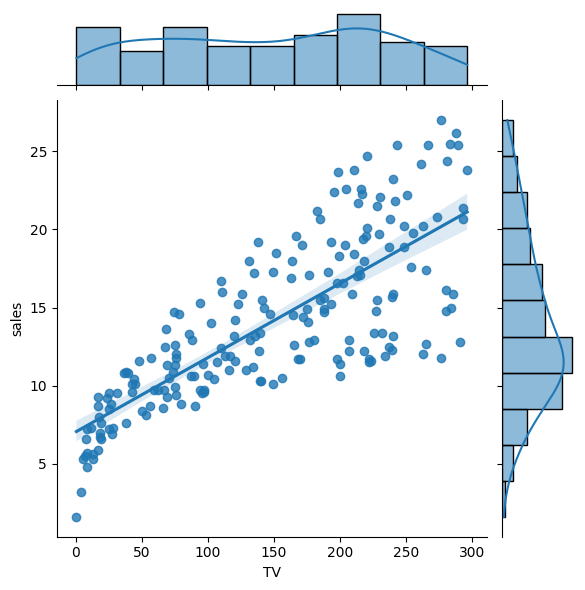

In [13]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

In [14]:
import statsmodels.api as sm

In [15]:
x = df.TV

In [16]:
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [17]:
x = sm.add_constant(x)

In [18]:
x

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8
...,...,...
195,1.0,38.2
196,1.0,94.2
197,1.0,177.0
198,1.0,283.6


In [19]:
y = df["sales"]

In [20]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [21]:
lm = sm.OLS(y,x)

In [22]:
model = lm.fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        23:35:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [25]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [26]:
model.f_pvalue

1.4673897001945906e-42

In [27]:
print("f_pvalue: ","%.3f"% model.f_pvalue)

f_pvalue:  0.000


In [28]:
print("fvalue: ","%.3f"% model.fvalue)

fvalue:  312.145


In [29]:
model.mse_model

3314.618166868649

In [30]:
model.rsquared_adj

0.6099148238341623

In [31]:
predict = model.fittedvalues

In [32]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [33]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [34]:
print("Sales = "+ str("%.2f"%model.params[0])+" + TV*" + str("%.3f"%model.params[1]))

Sales = 7.03 + TV*0.048


In [35]:
#Visualizing
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model denklemi : "+"Sales = "+ str("%.2f"%model.params[0])+" + TV*" + str("%.3f"%model.params[1]))
g.set_xlabel("TV Harcamaları")
g.set_ylabel("Satış sayısı")
plt.xlim(-10,310)
plt.ylim(bottom=0);

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

### Makine Öğrenmesinde Artıkların Önemi

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
import statsmodels.api as sm
x = df["TV"]
y = df["sales"]
x = sm.add_constant(x)
lm = sm.OLS(y,x)

In [47]:
model = lm.fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        23:44:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
mse = mean_squared_error(y,model.fittedvalues)

In [50]:
mse

10.512652915656757

In [51]:
model.predict(x)[:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [52]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [53]:
dataf = pd.DataFrame({"gercek_y":y[:10],"tahmin_y":model.predict(x)[:10]})

In [54]:
dataf

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [55]:
dataf["hata"] = dataf.gercek_y-dataf.tahmin_y

In [56]:
dataf

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [57]:
dataf["hata_kare"] = dataf.hata **2

In [58]:
dataf

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [59]:
dataf.hata_kare.sum()

92.90350329638103

In [60]:
dataf.hata_kare.mean()

9.290350329638104

In [62]:
import numpy as np
np.sqrt(dataf.hata_kare.mean())

3.0480075999967755

In [64]:
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

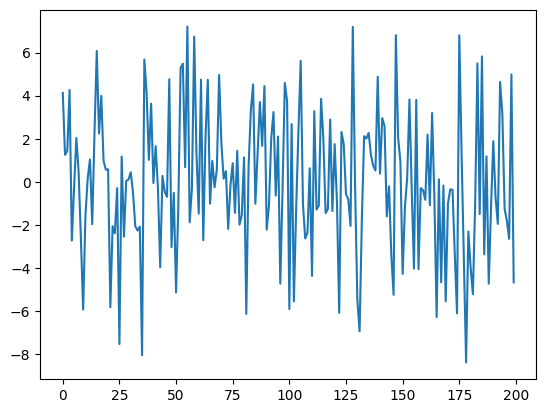

In [65]:
plt.plot(model.resid)

# Şimdi Bölüme dayalı  bazı regresyon çeşitlerini öntanımlıcaz

# Basit Doğrusal Regresyon Modeli

# Çoklu Doğrusal Regresyon Modeli

# Çoklu Doğrusal Regresyon 

In [66]:
ad = pd.read_csv(r"C:\Users\20190855029\data_ML\Advertising.csv")

In [67]:
df = ad.copy()

In [68]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [89]:
x = df.drop(["sales","Unnamed: 0"],axis=1)

In [90]:
y = df["sales"]

In [91]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [92]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=144)

In [119]:
x_train.shape

(160, 3)

In [120]:
y_train

132     5.7
17     24.4
81     12.3
73     11.0
82     11.3
       ... 
131    12.7
166     8.0
122    11.6
188    15.9
103    14.7
Name: sales, Length: 160, dtype: float64

In [121]:
training = df.copy()

In [122]:
training.shape

(200, 5)

In [123]:
lm = sm.OLS(y_train,x_train)

In [124]:
model = lm.fit()

In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2787.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                   7.04e-136
Time:                        01:04:37   Log-Likelihood:                         -339.00
No. Observations:                 160   AIC:                                      684.0
Df Residuals:                     157   BIC:                                      693.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0544      0.002     36.212      0.000       0.051       0.057
radio          0.2127      0.011     18.979      0.000       0.191       0.235
newspaper      0.0230      0.008      2.887      0.004       0.007       0.039
==============================================================================
Omnibus:                        6.947   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.358
Skew:                          -0.359   Prob(JB):                       0.0253
Kurtosis:                       3.766   Cond. No.                         13.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [127]:
model.intercept_

2.9470477340696757

In [128]:
model.coef_

array([0.04654781, 0.18148351, 0.00077954])

In [129]:
model.predict([[30,10,40]])

C:\Users\20190855029\AppData\Local\anaconda3\envs\spyder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.18949881])

In [130]:
rmse = np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

In [131]:
rmse

1.6748559274650712

In [132]:
rmse_test = np.sqrt(mean_squared_error(y_test,model.predict(x_test)))

In [133]:
rmse_test

1.664026368670103

In [134]:
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

1.6748559274650712

In [135]:
model.score(x_train,y_train)

0.8971614078663419

In [136]:
cross_val_score(model,x_train,y_train,cv=10,scoring="r2")

array([0.86580772, 0.92273806, 0.90690214, 0.9124702 , 0.69765146,
       0.92654282, 0.92526348, 0.94823778, 0.92941476, 0.69875488])

In [137]:
cross_val_score(model,x_train,y_train,cv=10,scoring="r2").mean()

0.873378329842294

In [138]:
cross_val_score(model,x_test,y_test,cv=10,scoring="neg_mean_squared_error")

array([-1.01930472, -1.00492969, -6.61930405, -3.00595358, -2.49950664,
       -6.17364417, -5.35729881, -2.47949459, -3.29827621, -1.71683906])

In [142]:
np.sqrt(-cross_val_score(model,x_test,y_test,cv=10,scoring="neg_mean_squared_error").mean())

1.82138824885006

In [144]:
np.sqrt(-cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")).mean()

1.6649345607872932